1


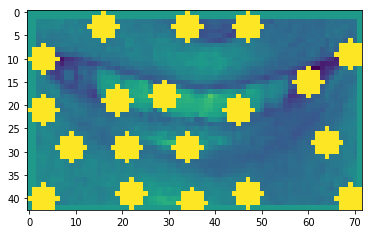

(<matplotlib.image.AxesImage at 0x108882b70>, None)

In [1]:
%matplotlib inline

import numpy as np
#import sys
#sys.path.append('/Users/Vicky/anaconda3/lib/python3.6/site-packages')
import cv2
import matplotlib.pyplot as plt
import time


def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



haar_smile_cascade = cv2.CascadeClassifier('/Users/Vicky/OneDrive/Projects/FaceAndSmileAnalyzer/classifiers/mouth.xml')
test = cv2.imread('/Users/Vicky/OneDrive/Projects/FaceAndSmileAnalyzer/test.jpg')

#cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)
gray_img = test
gray = cv2.cvtColor(gray_img,cv2.COLOR_BGR2GRAY)

#Detect smile
smile = haar_smile_cascade.detectMultiScale(gray_img,
                                            scaleFactor= 1.7,
                                            minNeighbors=22,
                                            minSize=(25, 25));
print (len(smile))


plt.imshow(gray_img)
for (x,y,w,h) in smile:
    img2 = gray_img[y:y+h, x:x+w];
    cv2.rectangle(gray_img, (x,y), (x+w,y+h), (0,255,0), 2)


img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
#plt.imshow(img2)

corners = cv2.goodFeaturesToTrack(img2,25,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img2,(x,y),3,255,-1)
    

plt.imshow(img2),plt.show()



In [ ]:
#test for my own faces
import numpy as np
import sys
sys.path.append('/usr/local/lib/python2.7/site-packages')
import cv2
import matplotlib.pyplot as plt
import time
%matplotlib inline

def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

haar_face_cascade = cv2.CascadeClassifier('/Users/Vicky/OneDrive/Projects/WebCamVideoFaceDetector/classifiers/haarcascade_frontalface_alt.xml')



cap = cv2.VideoCapture(0)
countt = 0
while(True):
    ret, frame = cap.read()
    gray_img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    #Detect faces
    faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5);
    
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0), 2)
        face = gray_img[y:y+h, x:x+w]
        face = cv2.resize(face, (64,64))
        arr = np.array(face)
        countt = countt + 1
        if countt <= 100:
            cv2.imwrite("./myface/not_smiling/"+str(countt)+".jpg", arr.reshape(64,64))

    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()


In [2]:
%matplotlib inline
from pylab import *
import glob


faces = glob.glob("/Users/Vicky/OneDrive/Projects/FaceAndSmileAnalyzer/myface/smiling/*.jpg")

X = []
for face in faces:
    img = cv2.imread(face)
    
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #convert img into np array
    arr = np.array(img)
    [w,h] = arr.shape[0], arr.shape[1]
    arr = arr.reshape(w*h)
    X.append(arr)


faces = glob.glob("/Users/Vicky/OneDrive/Projects/FaceAndSmileAnalyzer/myface/not_smiling/*.jpg")


for face in faces:
    img = cv2.imread(face)
    
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #convert img into np array
    arr = np.array(img)
    [w,h] = arr.shape[0], arr.shape[1]
    arr = arr.reshape(w*h)
    X.append(arr)

    
X = np.array(X, dtype=float)
X.shape


(200, 4096)

In [3]:
#Building Target Label. 

Y = np.full((100,1), 1)
Y.shape

Y2 = np.full((100,1), 0)
Y2.shape



Y = np.concatenate([Y,Y2])
Y.shape



(200, 1)

In [4]:
#Training the classifier. 


from sklearn import svm





In [5]:
#database split 

from sklearn.cross_validation import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=20, random_state=10)

/Users/Vicky/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
X_train.shape

(180, 4096)

In [7]:
#Fit the model
X = X_train
Y = Y_train
C = 1.0
svc = svm.SVC(kernel='linear',C=C).fit(X,Y)

/Users/Vicky/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
import numpy as np
import sys
sys.path.append('/usr/local/lib/python2.7/site-packages')
import cv2
import matplotlib.pyplot as plt
import time
%matplotlib inline

def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

haar_face_cascade = cv2.CascadeClassifier('/Users/Vicky/OneDrive/Projects/WebCamVideoFaceDetector/classifiers/haarcascade_frontalface_alt.xml')
img = cv2.imread('/Users/Vicky/Dropbox/Projects/WebCamVideoFaceDetector/baby.png')


cap = cv2.VideoCapture(0)

while(True):
    ret, frame = cap.read()
    gray_img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    #Detect faces
    faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5);
    
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0), 2)
        face = gray_img[y:y+h, x:x+w]
        face = cv2.resize(face, (64,64))
        arr = np.array(face)
        [w,h] = arr.shape[0], arr.shape[1]
        arr = arr.reshape(w*h).reshape(1, -1)
        #print(svc.predict(arr))
        if svc.predict(arr) == 1:
            cv2.putText(frame, "SMILING",(x,y), cv2.FONT_HERSHEY_SIMPLEX, 2, 155, 10)
        else:
            cv2.putText(frame, "Not SMILING",(x,y), cv2.FONT_HERSHEY_SIMPLEX, 2, 155, 10)
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()